In [1]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd

## This notebook creates the figure highlighting our project domain (the central CONUS; Fig. 1). The domain consists of the region from 26 to 49$^{\circ}$N and 87 to 107$^{\circ}$W. 

#### EML_May_2012_2021.csv contains 10 years (2012-2021) of EML data for the month of May only. Data are 6-hourly (0, 6, 12, 18 UTC).
 - 'eml' variable is binary, where 1=EML, 0=no EML. This is the variable we are trying to predict.
 - latitude, longitude, and time variables indicate when and where there is or isn't an EML.
 - all other variables are possible predictors for our ML model

In [2]:
# Open the CSV file containing the May 2012-2021 EML dataset
df = pd.read_csv('/home/scratch/mandrews/eae_598/EML_May_2012_2021.csv')
df.head()

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_850,theta_925,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,NaN,NaN,313.883362,NaN,0.267810,NaN,NaN,0.448221,0.275484,0.199151
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,NaN,NaN,315.494537,NaN,0.253985,NaN,NaN,0.365675,0.325275,0.236668
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,NaN,NaN,316.565155,NaN,0.233949,NaN,NaN,0.309428,0.276469,0.241000
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,NaN,NaN,317.429565,NaN,0.219240,NaN,NaN,0.280152,0.366142,0.259380
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,NaN,NaN,318.495514,NaN,0.158403,NaN,NaN,0.231137,0.591805,0.389781


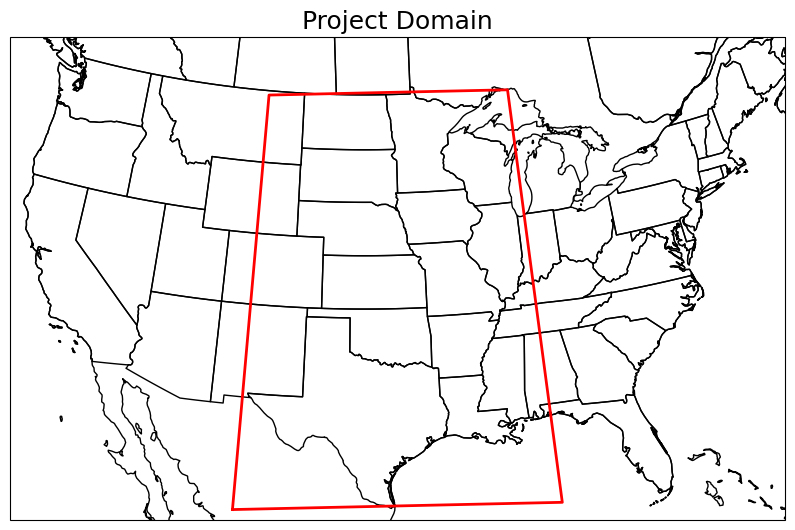

In [3]:
# Plot our project domain
fig= plt.figure(figsize=(10, 7))
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-99, central_latitude=35))
ax.set_extent([-120, -74, 23, 50])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

# Create a domain box
min_lon = -1*(360-253) # ERA5 longitudes range from 0-360; convert from -180 to 180
max_lon = -1*(360-273) # ERA5 longitudes range from 0-360; convert from -180 to 180
min_lat = 25.5         # value is adjusted slightly from actual latitude bounds to more accurately highlight domain region on map
max_lat = 48.75        # value is adjusted slightly from actual latitude bounds to more accurately highlight domain region on map

# Plot the domain box on map
ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], [min_lat, min_lat, max_lat, max_lat, min_lat],
        color='red', linewidth=2, transform=ccrs.PlateCarree())
plt.title('Project Domain', fontsize=18)

plt.show()